## Tarea 2: Física computacional 

### Laura Sofía Arango Tabares
### CC. 1152471978

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definimos las funciones a utilizar 

# Método de Runge-Kutta 4
def RK4(f,x,y0,h):
    n=len(x)
    y=np.zeros(n)
    y[0]=y0
    for i in range (1,n):
        k1=f(x[i-1],y[i-1])
        k2=f(x[i-1]+h/2,y[i-1]+(h/2)*k1)
        k3=f(x[i-1]+h/2,y[i-1]+(h/2)*k2)
        k4=f(x[i-1]+h,y[i-1]+(h*k3))
        y[i]=y[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
    return y

# Método de Adam-Bashfort

def AB(f,x,y,h=1):
    n=len(x)
    s=np.zeros(n)
    s[0:4]=y[0:4]
    for i in range(4,n):
        wip=y[i-1]+(h/24)*(55*f(x[i-1],y[i-1])-59*f(x[i-2],y[i-2])
                         +37*f(x[i-3],y[i-3])-9*f(x[i-4],y[i-4])) 
        y[i]=wip
        s[i]=wip
        
    return s

# Método de Adams-Moulto
def AM(f,x,y,h=1):
    n=len(x)
    sol=np.copy(y)

    for i in range(3,n):
        wi=sol[i-1]+(h/24)*(9*f(x[i],sol[i])+19*f(x[i-1],sol[i-1])-
                          5*f(x[i-2],sol[i-2])+f(x[i-3],sol[i-3]))
        sol[i]=wi
    return sol

# Método de Adam-Bashfort con corrección de Adams-Moulton 
def PC(f,x,y,h=1):
    n=len(x)
    so=np.zeros(n)
    so[0:4]=y[0:4]
    for i in range(4,n):
        wip=so[i-1]+(h/24)*(55*f(x[i-1],so[i-1])-59*f(x[i-2],so[i-2])
                         +37*f(x[i-3],so[i-3])-9*f(x[i-4],so[i-4])) 

        wi=so[i-1]+(h/24)*(9*f(x[i],wip)+19*f(x[i-1],so[i-1])-
                          5*f(x[i-2],so[i-2])+f(x[i-3],so[i-3]))
        so[i]=wi

    return so

## Punto 1

Suponga que un estudiante es portador de un virus y regresa a su aislado campus de 1000 estudiantes.
Si se supone que la razón con que se propaga el virus es proporcional no sólo a la cantidad $x$ de estudiantes infectados sino también a la cantidad de estudiantes no infectados. Determine la cantidad de estudiantes infectados después de 12 días.

Suponiendo que nadie deja el campus mientras dura la enfermedad, debemos resolver el siguiente
problema de valor inicial:

$$\frac{d x}{d t}=k x(1000-x), \quad x(0)=1, \quad k=0.0009906$$




In [2]:
# Definimos la ED a resolver
def inf(t,x):
    f=k*x*(1000-x)
    return f
k=0.0009906

# Condiciones iniciales
t0,x0=0,1
h=1
t=np.arange(0,13,h)
t[0]=t0

In [3]:
# Calculamos los primeros valores utilizando RK4
Xi=RK4(inf,t[0:5],x0,h)
X=np.zeros(len(t))
X[0:4]=Xi[0:4]

# Cáculo con RK4
X4=RK4(inf,t,x0,h)

# Cálculo con Adam-Bashfort
X_AB=AB(inf,t,X,h)
    
# Cálculo con Adams-Moulton corriejiendo RK4
X_AM=AM(inf,t,X4,h)

# Cálculo con AB y correjido con AM
X_PC=PC(inf,t,X,h)

# Solución analítica
t=np.arange(0,13,h)
x_a=1000*np.exp(0.9906*t)/(np.exp(0.9906*t)+999)


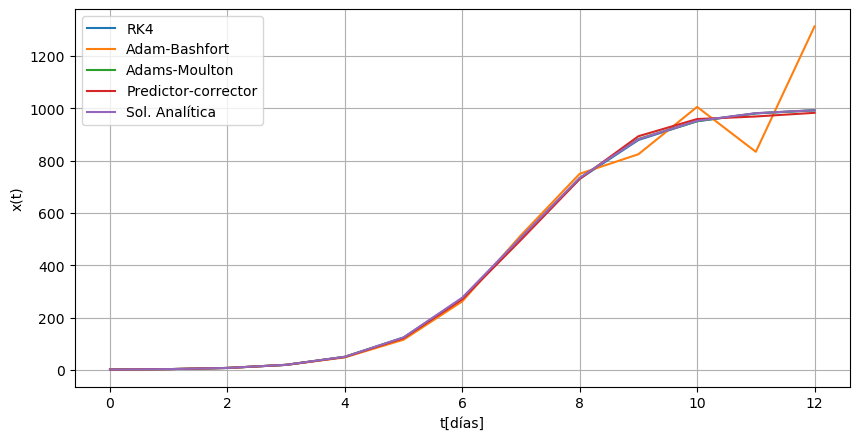

In [4]:
plt.figure(dpi=100,figsize=[10,5])
plt.plot(t,X4,label='RK4')
plt.plot(t,X_AB,label='Adam-Bashfort')
plt.plot(t,X_AM,label='Adams-Moulton')
plt.plot(t,X_PC,label='Predictor-corrector')
plt.plot(t,x_a,label='Sol. Analítica')
plt.legend()
plt.grid()
plt.xlabel('t[días]')
plt.ylabel('x(t)')
plt.show()

In [5]:
# Se define directorio 
sol={'$t_i$':t,'Sol analítica':x_a,'Sol RK4':X4,'Error Rk4':abs(x_a-X4),
     'Sol AB':X_AB,'Error AB':abs(x_a-X_AB),'Solución AM':X_AM,'Error AM':abs(x_a-X_AM),
     'Solución P-C':X_PC,'Error P-C':abs(x_a-X_PC)}

dtf=pd.DataFrame(sol)
dtf

,$t_i$,Sol analítica,Sol RK4,Error Rk4,Sol AB,Error AB,Solución AM,Error AM,Solución P-C,Error P-C
0,0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,1,2.688299,2.678928,0.009371,2.678928,0.009371,2.678928,0.009371,2.678928,0.009371
2,2,7.206389,7.156728,0.049661,7.156728,0.049661,7.156728,0.049661,7.156728,0.049661
3,3,19.171839,18.978531,0.193308,18.978531,0.193308,19.135148,0.036691,18.978531,0.193308
4,4,50.004000,49.368632,0.635368,47.650118,2.353881,49.931970,0.072030,49.080762,0.923238
5,5,124.144515,122.408627,1.735888,115.186453,8.958062,123.460078,0.684437,121.233737,2.910777
6,6,276.247000,272.696146,3.550855,261.838719,14.408281,272.987343,3.259657,270.018443,6.228557
7,7,506.860875,502.182535,4.678340,514.798429,7.937554,501.120347,5.740527,497.218195,9.642679
8,8,734.591657,730.784302,3.807355,749.944241,15.352584,733.767505,0.824153,730.189690,4.401967
9,9,881.701787,879.177508,2.524279,824.693992,57.007795,883.025896,1.324109,893.628681,11.926894


## Punto 2

Es posible realizar un control adaptativo de paso en el método predictor-corrector realizado en la problema 1. Use un $hmax = 1$, $hmin = 0.1$ y una tolerancia de $T OL = 10^{−5}$ para encontrar la solución aproximada de $x(t)$.

In [6]:
TOL=1e-5
# para determinar si el cálculo con h=1 es aceptable calculemos epsilon 
e=(19/270*h)*abs((X_AB[4]-X_PC[4]))
# el error soy yo, y nadie es más grande que yo
print(e>TOL)

True


Así vemos que el error en el cálculo no es aceptado para la tolerancia dada, de modo que se procede a definir una función de predictor corrector con paso adaptativo.

In [99]:
# El nuevo h sería 
H=(TOL/(2*e))**(0.25)*h

# Calculamos los valores iniciales con RK4 y H
t_H=np.arange(0,13,H)
X_H=RK4(inf,t_H[0:4],x0,H)

In [90]:
def funcion(x):
    f=k*x*(1000-x)
    return f
k=0.0009906

def PC_PA(f, x0, xf,y, hmin = 0.1, hmax = 1, Tol = 5):
    
    n = len(y)          
    h = hmax
    x = x0
    Y = np.copy(y)       
    i = 3
    Wi=[1,2,3,4] # se inicializa arreglo de tal manera que W[i]-W[i-1] no se menor que la 
                # tolerancia dada, pues los valores iniciales crecen despacio
                
    while x[i]<xf:
    
        wip = Y[i]+h/24*(55*f(Y[i])-59*f(Y[i-1])+37*f(Y[i-2])-9*f(Y[i-3])) 

        wi = Y[i]+h/24*(9*f(wip)+19*f(Y[i])-5*f(Y[i-1])+f(Y[i-2]))
        
        Wi=np.append(Wi,wi) # arreglo para guardar TODOS los valores calculados

       
        if abs(Wi[i]-Wi[i-1])<0.26: break # condición de romper se el algoritmo se estanca
        
        # Calculamos el error
        error = (19/270)*abs((wip-wi)).max()
        
        q = 0.84*(Tol/error)**0.25
        
        if (error/h < Tol): 
            
            x = np.append(x, x[i]+h ) # se aumenta el tiempo en pasos de h aceptado
            Y=np.append(Y, wi)        # se guardan los wi aceptados
            i=i+1        
        
        if (q <= 0.1): 
            h = 0.1*h           
            
        elif (q >= 5):
            h = 5*h       
        else:       
            h = q*h     
        if   (h > hmax): h = hmax  
        elif (h < hmin): 
            print('Se rompe',h)
            break
            
        if (x[i]+h > xf): h = xf - x[i]               
    return x,Y 

Anotación: Las condiciones iniciales para las cuales funciona son una tolerancia mayor a 5,los valores de h propuestos por el problema. 

Se agregó una condición de break al algoritmo puesto que se estaba estancando en un valor específico, entonces si los valores $wi$ son muy similares, el while se rompe. 

In [100]:

T,SOL=PC_PA(funcion,t_H[0:4],12,X_H,Tol=5)
x_A=1000*np.exp(0.9906*T)/(np.exp(0.9906*T)+999)

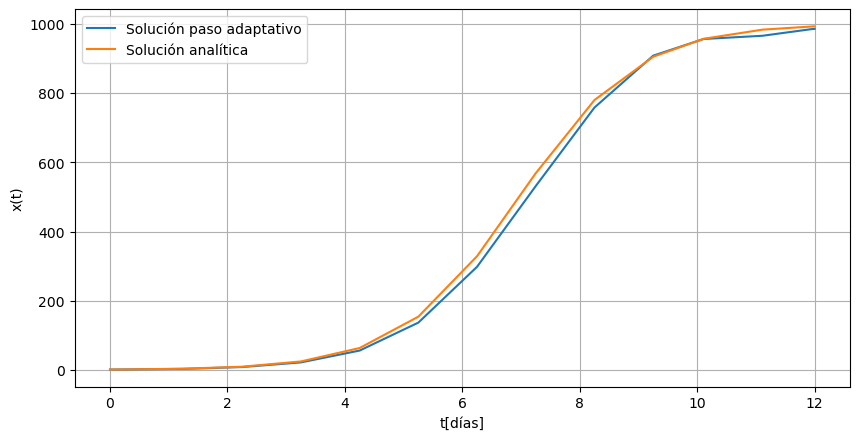

In [101]:
plt.figure(dpi=100,figsize=[10,5])

plt.plot(T,SOL,label='Solución paso adaptativo')
plt.plot(T,x_A,label='Solución analítica')
plt.legend()
plt.grid()
plt.xlabel('t[días]')
plt.ylabel('x(t)')
plt.show()


In [103]:
P2={'$t_i$':T,'Sol analítica':x_A,'Sol P-C adaptativo':SOL,'Error P-C-A':abs(x_A-SOL)}

p2=pd.DataFrame(P2)
p2

,$t_i$,Sol analítica,Sol P-C adaptativo,Error P-C-A
0,0.000000,1.000000,1.000000,0.000000e+00
1,0.083948,1.086621,1.086621,3.339587e-08
2,0.167897,1.180735,1.180735,7.255383e-08
3,0.251845,1.282991,1.282991,1.182161e-07
4,1.251845,3.447416,3.054957,3.924586e-01
5,2.251845,9.229509,8.265717,9.637923e-01
6,3.251845,24.471336,21.747560,2.723776e+00
7,4.251845,63.276326,55.926931,7.349395e+00
8,5.251845,153.907480,136.759456,1.714802e+01
9,6.251845,328.786852,298.158282,3.062857e+01
